## Pokemon Data Analysis

### Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

import qgrid

### About Data

In [2]:
data = pd.read_csv("pokemon_data.csv")
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [3]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
data[data['Name'] == 'Pikachu']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False


## We will try to find out answers for following questions

*  Which are top 20 strongest pokemons?
*  Which type of pokemons are best ?
*  Top 20 Fastest Pokemons
*  Top 10 Aggresive and Defensive Pokemons.
*  Find out Correlated parameters 
*  Generation and Legendary wise analysis

### Data cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
data.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

we see type 2 has some null values

In [7]:
data[data['Type 2'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


Out of 800 386 have type 2 as Null.
we can't drop them all. 
Instead we will set type 2 as type 1

In [8]:
data['Type 2'].fillna(data['Type 1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type

In [9]:
data.isnull().any()

#             False
Name          False
Type 1        False
Type 2        False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

#### now we dont have any null values in our data

In [10]:
data.iloc[4:12] ## confirmation that Nan values of Type 2 are replaced with Type 1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Water,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Water,79,83,100,85,105,78,1,False


In [11]:
### we don't need the rank column as it is of no use

data.drop('#' ,axis=1 , inplace= True)
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False


In [12]:
## we see that in names, Mega Pokemons contained extra and unneeded text. 

data[data['Name'].str.contains('Mega')].head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,BlastoiseMega Blastoise,Water,Water,79,103,120,135,115,78,1,False
19,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
23,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False
71,AlakazamMega Alakazam,Psychic,Psychic,55,50,65,175,95,150,1,False
87,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False
102,GengarMega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False
124,KangaskhanMega Kangaskhan,Normal,Normal,105,125,100,60,100,100,1,False


In [13]:
## Remove all the text before "Mega"  
# A(?=B) | Lookahead assertion. This matches the expression A only if it is followed by B

data['Name'] = data['Name'].str.replace(".*(?=Mega)", "")
data.head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Fire,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,Squirtle,Water,Water,44,48,65,50,64,43,1,False


In [14]:
## let's make name as index

data.set_index('Name' , inplace= True)
data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,39,52,43,60,50,65,1,False


## Lets make some changes in data

In [15]:
data['Total_Atk'] = data['Attack'] + data['Sp. Atk']
data['Total_Def'] = data['Defense'] + data['Sp. Def']
data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Atk,Total_Def
Name,,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,114,114
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,142,143
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,182,183
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,222,243
Charmander,Fire,Fire,39,52,43,60,50,65,1,False,112,93


In [16]:
49 + 65

114

In [17]:
data['Total'] = data['Total_Atk'] + data['Total_Def']
data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Atk,Total_Def,Total
Name,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,114,114,228
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,142,143,285
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,182,183,365
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,222,243,465
Charmander,Fire,Fire,39,52,43,60,50,65,1,False,112,93,205


In [18]:
## made list of columns
cols = list(data.columns.values)
cols

['Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Total_Atk',
 'Total_Def',
 'Total']

In [19]:
# Reorder data for better visualization

data2 = data[cols[0:4] + [cols[5]] + [cols[10]] +
             [cols[4]] + [cols[6]] + cols[11:] + cols[7:10]]
data2.head()

,Type 1,Type 2,HP,Attack,Sp. Atk,Total_Atk,Defense,Sp. Def,Total_Def,Total,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,65,114,49,65,114,228,45,1,False
Ivysaur,Grass,Poison,60,62,80,142,63,80,143,285,60,1,False
Venusaur,Grass,Poison,80,82,100,182,83,100,183,365,80,1,False
Mega Venusaur,Grass,Poison,80,100,122,222,123,120,243,465,80,1,False
Charmander,Fire,Fire,39,52,60,112,43,50,93,205,65,1,False


In [20]:
data2.describe()

,HP,Attack,Sp. Atk,Total_Atk,Defense,Sp. Def,Total_Def,Total,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,72.820000,151.821250,73.842500,71.902500,145.745000,297.566250,68.277500,3.32375
std,25.534669,32.457366,32.722294,54.462505,31.183501,27.828916,51.315827,91.336677,29.060474,1.66129
min,1.000000,5.000000,10.000000,20.000000,5.000000,20.000000,35.000000,90.000000,5.000000,1.00000
25%,50.000000,55.000000,49.750000,111.750000,50.000000,50.000000,109.750000,225.000000,45.000000,2.00000
50%,65.000000,75.000000,65.000000,146.500000,70.000000,70.000000,140.000000,295.000000,65.000000,3.00000
75%,80.000000,100.000000,95.000000,182.000000,90.000000,90.000000,180.000000,365.000000,90.000000,5.00000
max,255.000000,190.000000,194.000000,360.000000,230.000000,230.000000,460.000000,580.000000,180.000000,6.00000


### Makes it easy to filter 

In [21]:
qgrid_widget = qgrid.show_grid(data2 , show_toolbar= True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Visualizations

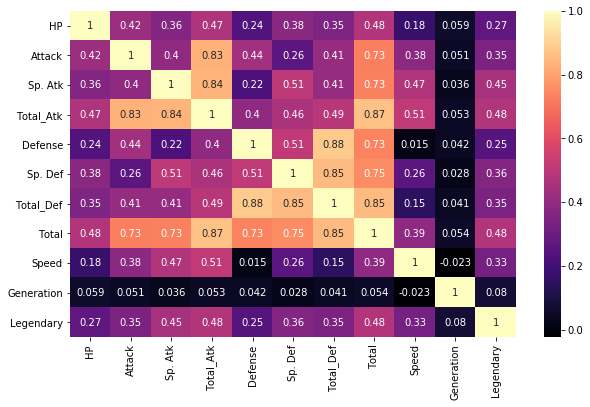

In [22]:
plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(data2.corr(),annot=True , cmap="magma") #data.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

From the heatmap it can be seen that there is not much correlation between the attributes of the pokemons.
Total is derived from attack and defence so not that special.
The highest informative we can see is the correlation between 
*  Speed and the Total_Atk = 0.51 
*  HP and total = 0.48

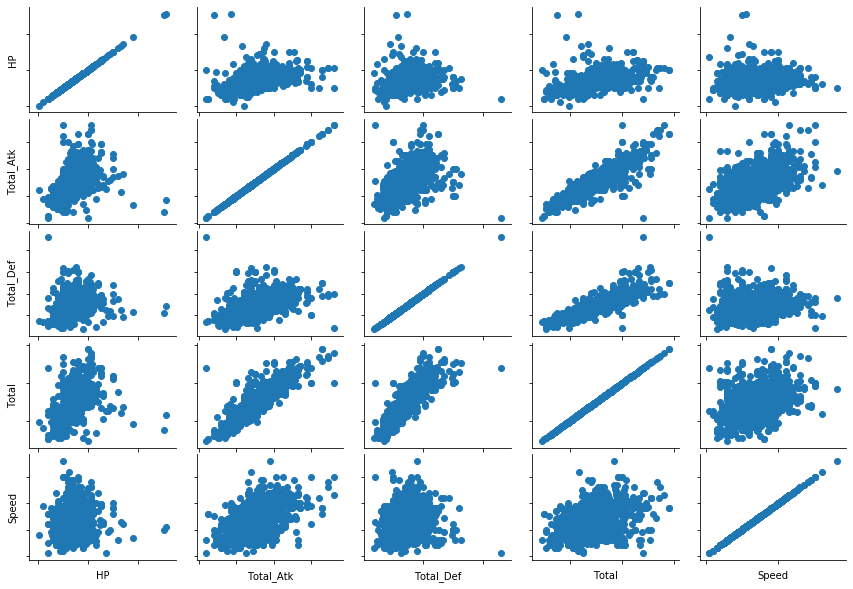

In [23]:

g = sns.PairGrid(data2, vars=['HP', 'Total_Atk', 'Total_Def', 'Total' , 'Speed']) 
g.map(plt.scatter ) 
g.set(xticklabels=[] , yticklabels = [])
g.fig.set_size_inches(12,8)


we can see that there is positive correlation between speed and total attack

## Let's see if we can determine how speed is related

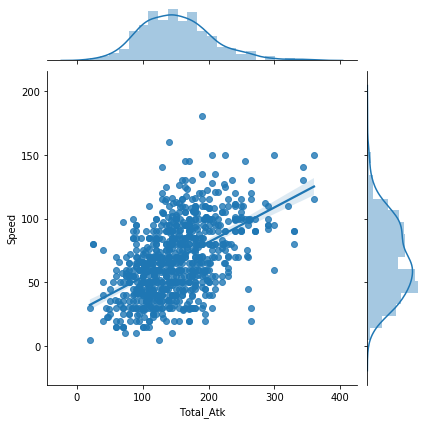

In [24]:
sns.jointplot(data = data2 ,x="Total_Atk", y="Speed" , kind="reg")



This jointplot explains relationship between Total_Attack and Speed..
As speed increases , attack of pokemon increases.

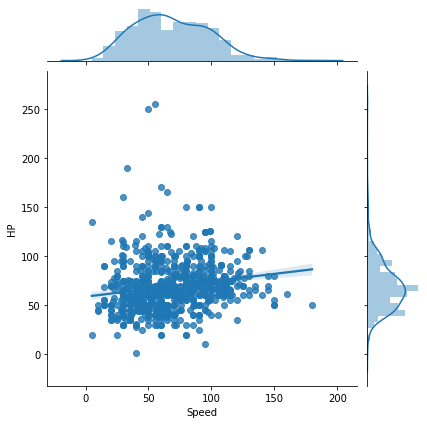

In [25]:
sns.jointplot(data = data2 ,y="HP", x="Speed" , kind="reg")

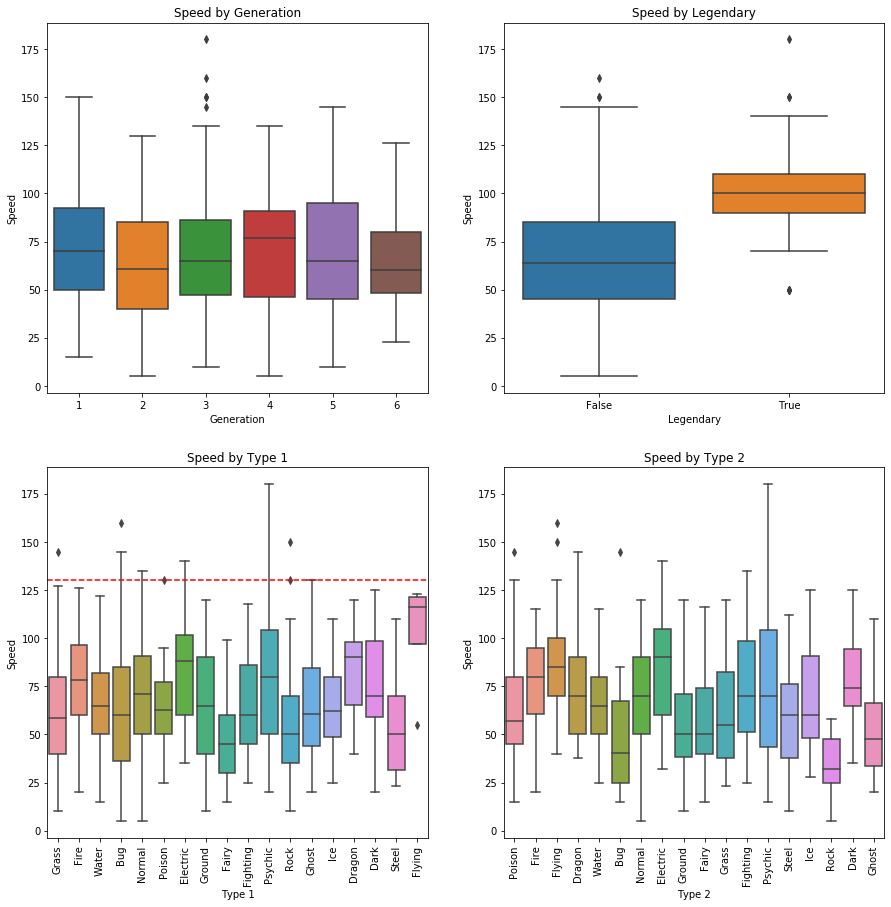

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Speed by Generation' )
sns.boxplot(x = "Generation", y = "Speed",data=data2)

plt.subplot(222)
plt.title('Speed by Legendary' )
sns.boxplot(x = "Legendary", y = "Speed",data=data2)

plt.subplot(223)
plt.title('Speed by Type 1' )
g = sns.boxplot(x = "Type 1", y = "Speed",data=data2)
g.set_xticklabels(labels = data2['Type 1'].unique(),rotation = 90)
plt.axhline(130,color='red',linestyle='dashed')

plt.subplot(224)
plt.title('Speed by Type 2' )
g = sns.boxplot(x = "Type 2", y = "Speed",data=data2)
g.set_xticklabels(labels = data2['Type 2'].unique(),rotation = 90)


plt.show()

In [27]:
data2[data2['Type 2'] == "Flying"].Speed.max() ## crosschecking

160

In [28]:
data2['Speed'].describe()

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

*  There is no significant difference in generations to detect speed.
*  From second plots we can say that Legendary pokemons have higher speed than non legendary
*  Type 1 desribes alot about speed.
*  Almost all Flying pokemons have speed above 100 which is obvious !
*  There are some Bug , electric and Psychic Pokemons having speed above 130
*  Almost half of type 2 is taken from Type 1 but some of Dragon pokemons have speed above 130

In [29]:
data2['Speed'].quantile(.98)

130.0

### Pokemons having speed above 130 (Superfast)

In [30]:
superfast = data2[data2['Speed'] >= 130].sort_values('Speed' , ascending = 0)
superfast[['Type 1' ,'Speed' , 'Legendary'] ] 

,Type 1,Speed,Legendary
Name,,,
DeoxysSpeed Forme,Psychic,180,True
Ninjask,Bug,160,False
Mega Alakazam,Psychic,150,False
DeoxysAttack Forme,Psychic,150,True
DeoxysNormal Forme,Psychic,150,True
Mega Aerodactyl,Rock,150,False
Mega Beedrill,Bug,145,False
Mega Sceptile,Grass,145,False
Accelgor,Bug,145,False


### Fastest Pokemons By Types

In [31]:
data2.sort_values(by = 'Speed' , ascending = 0).drop_duplicates(subset=['Type 1'],keep='first')[['Type 1' ,'Speed' , 'Legendary'] ] 

,Type 1,Speed,Legendary
Name,,,
DeoxysSpeed Forme,Psychic,180,True
Ninjask,Bug,160,False
Mega Aerodactyl,Rock,150,False
Mega Sceptile,Grass,145,False
Electrode,Electric,140,False
Mega Lopunny,Normal,135,False
Crobat,Poison,130,False
Mega Gengar,Ghost,130,False
Talonflame,Fire,126,False


As we saw positive correlation between speed and Attack tells us that faster pokemons are better at attacking.

We can see that most of them are not legendary , lets find the count.

In [32]:
data2['Legendary'].value_counts()
# There are only 65 Legendary pokemons out of 800

False    735
True      65
Name: Legendary, dtype: int64

In [33]:
superfast['Legendary'].value_counts()

False    13
True      6
Name: Legendary, dtype: int64

Out of 19 superfast pokemons 6 are legendary (almost 33%)

### Let's find out aggressive and defensive pokemons 

In [34]:
data2['Total_Atk'].describe()

count    800.000000
mean     151.821250
std       54.462505
min       20.000000
25%      111.750000
50%      146.500000
75%      182.000000
max      360.000000
Name: Total_Atk, dtype: float64

In [35]:
data2['Total_Atk'].quantile(.98)

285.0999999999999

In [36]:
aggresive = data2[data2['Total_Atk'] >= 285].sort_values('Total_Atk' , ascending = 0)
aggresive[[ 'Type 1' , 'Total_Atk' , 'Legendary']]

,Type 1,Total_Atk,Legendary
Name,,,
DeoxysAttack Forme,Psychic,360,True
Mega Rayquaza,Dragon,360,True
Mega Mewtwo X,Psychic,344,True
Mega Mewtwo Y,Psychic,344,True
GroudonPrimal Groudon,Ground,330,True
HoopaHoopa Unbound,Psychic,330,True
KyogrePrimal Kyogre,Water,330,True
Mega Diancie,Rock,320,True
Rayquaza,Dragon,300,True


In [37]:
aggresive['Type 1'].value_counts()

Dragon      6
Psychic     5
Water       1
Fighting    1
Fire        1
Ground      1
Rock        1
Steel       1
Name: Type 1, dtype: int64

In [38]:
aggresive['Legendary'].value_counts()

True     13
False     4
Name: Legendary, dtype: int64

### Defensive

In [39]:
data2['Total_Def'].describe()

count    800.000000
mean     145.745000
std       51.315827
min       35.000000
25%      109.750000
50%      140.000000
75%      180.000000
max      460.000000
Name: Total_Def, dtype: float64

In [40]:
data2['Total_Def'].quantile(.98)

265.0999999999999

In [41]:
defensive = data2[data2['Total_Def'] >= 265].sort_values('Total_Def' , ascending = 0)
defensive[[ 'Type 1' , 'Total_Def' , 'Legendary']]

,Type 1,Total_Def,Legendary
Name,,,
Shuckle,Bug,460,False
Mega Steelix,Steel,325,False
DeoxysDefense Forme,Psychic,320,True
Mega Aggron,Steel,310,False
Bastiodon,Rock,306,False
Registeel,Steel,300,True
Carbink,Rock,300,False
AegislashShield Forme,Steel,300,False
Diancie,Rock,300,True


In [42]:
defensive['Legendary'].value_counts()

False    10
True      7
Name: Legendary, dtype: int64

In [43]:
defensive['Type 1'].value_counts()

Rock       6
Steel      5
Psychic    2
Ice        1
Dragon     1
Ghost      1
Bug        1
Name: Type 1, dtype: int64

### making an attack defense index where we will get to know that pokemon has higher attack or defense

*  positive index value means aggresive
*  negative index value means defensive

In [44]:
pd.options.mode.chained_assignment = None  # default='warn'

data2['AD_index'] = round(1 - data2['Total_Def']/data2['Total_Atk'],3)
data2.head(10)[['Total_Def','Total_Atk', 'AD_index']]

,Total_Def,Total_Atk,AD_index
Name,,,
Bulbasaur,114,114,0.000
Ivysaur,143,142,-0.007
Venusaur,183,182,-0.005
Mega Venusaur,243,222,-0.095
Charmander,93,112,0.170
Charmeleon,123,144,0.146
Charizard,163,193,0.155
Mega Charizard X,196,260,0.246
Mega Charizard Y,193,263,0.266


In [45]:
# data2['AD_status'] = ["Aggresive" if data2['AD_index'] > 0 else "Defensive"]
#data2.head(10)[['Total_Def','Total_Atk', 'AD_index' , 'AD_status']]

data2['AD_status'] = np.where(data2['AD_index'] > 0, 'Aggresive', 'Defensive')
data2.loc[data2['AD_index'] == float(0), ('AD_status')] = "Neutral"
data2.head(10)[['Total_Def','Total_Atk', 'AD_index' , 'AD_status']]

,Total_Def,Total_Atk,AD_index,AD_status
Name,,,,
Bulbasaur,114,114,0.000,Neutral
Ivysaur,143,142,-0.007,Defensive
Venusaur,183,182,-0.005,Defensive
Mega Venusaur,243,222,-0.095,Defensive
Charmander,93,112,0.170,Aggresive
Charmeleon,123,144,0.146,Aggresive
Charizard,163,193,0.155,Aggresive
Mega Charizard X,196,260,0.246,Aggresive
Mega Charizard Y,193,263,0.266,Aggresive


In [46]:
data2.tail()

,Type 1,Type 2,HP,Attack,Sp. Atk,Total_Atk,Defense,Sp. Def,Total_Def,Total,Speed,Generation,Legendary,AD_index,AD_status
Name,,,,,,,,,,,,,,,
Diancie,Rock,Fairy,50,100,100,200,150,150,300,500,50,6,True,-0.500,Defensive
Mega Diancie,Rock,Fairy,50,160,160,320,110,110,220,540,110,6,True,0.312,Aggresive
HoopaHoopa Confined,Psychic,Ghost,80,110,150,260,60,130,190,450,70,6,True,0.269,Aggresive
HoopaHoopa Unbound,Psychic,Dark,80,160,170,330,60,130,190,520,80,6,True,0.424,Aggresive
Volcanion,Fire,Water,80,110,130,240,120,90,210,450,70,6,True,0.125,Aggresive


In [47]:
data2['AD_index'].describe()

count    800.000000
mean      -0.051661
std        0.874078
min      -22.000000
25%       -0.155000
50%        0.043000
75%        0.220000
max        0.889000
Name: AD_index, dtype: float64

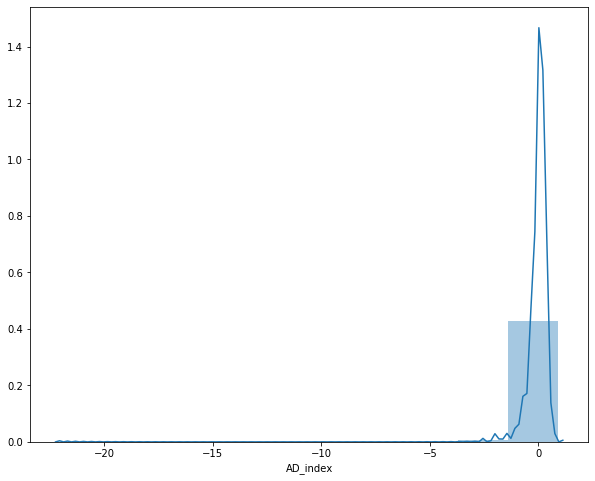

In [48]:
plt.figure(figsize=(10,8))
x = data2['AD_index']
sns.distplot(x, bins=10)
plt.show()
# This is some kind of histogram graph about AD_index

In [49]:
data2[data2['AD_index'] < -2]

,Type 1,Type 2,HP,Attack,Sp. Atk,Total_Atk,Defense,Sp. Def,Total_Def,Total,Speed,Generation,Legendary,AD_index,AD_status
Name,,,,,,,,,,,,,,,
Shuckle,Bug,Rock,20,10,10,20,230,230,460,480,5,2,False,-22.000,Defensive
Bastiodon,Rock,Steel,60,52,47,99,168,138,306,405,30,4,False,-2.091,Defensive
Bronzor,Steel,Psychic,57,24,24,48,86,86,172,220,23,4,False,-2.583,Defensive
Happiny,Normal,Normal,100,5,15,20,5,65,70,90,30,4,False,-2.500,Defensive


 shuckle is an outlier having  Total def = 460 but Total atk = 10 only
 It is defensive but attack is too low

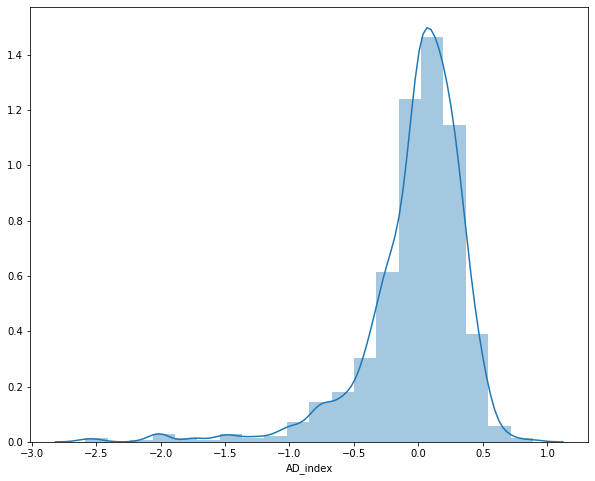

In [50]:
plt.figure(figsize=(10,8))
x = data2[data2['AD_index'] > -3]['AD_index'] ## excluding -22
sns.distplot(x, bins=20  )
plt.show()
# This is some kind of histogram graph about AD_index

In [51]:
(data2['AD_status']).value_counts()

Aggresive    435
Defensive    309
Neutral       56
Name: AD_status, dtype: int64

In [52]:
data2[data2['Total_Atk'] >= 285].sort_values('Total' , ascending = 0)[[ 'Type 1' ,'Total_Atk', 'Total_Def' ,'Total' ,'AD_index']]

## Descending gives us aggressive pokemons

,Type 1,Total_Atk,Total_Def,Total,AD_index
Name,,,,,
KyogrePrimal Kyogre,Water,330,250,580,0.242
GroudonPrimal Groudon,Ground,330,250,580,0.242
Mega Rayquaza,Dragon,360,200,560,0.444
Mega Mewtwo X,Psychic,344,200,544,0.419
Mega Diancie,Rock,320,220,540,0.312
Mega Mewtwo Y,Psychic,344,190,534,0.448
HoopaHoopa Unbound,Psychic,330,190,520,0.424
Mega Latios,Dragon,290,220,510,0.241
Mega Garchomp,Dragon,290,210,500,0.276


In [53]:
data2[data2['Total_Def'] >= 265].sort_values('AD_index' , ascending = 1)[[ 'Type 1' ,'Total_Atk', 'Total_Def' ,'Total' ,'AD_index']]



,Type 1,Total_Atk,Total_Def,Total,AD_index
Name,,,,,
Shuckle,Bug,20,460,480,-22.000
Bastiodon,Rock,99,306,405,-2.091
AegislashShield Forme,Steel,100,300,400,-2.000
Carbink,Rock,100,300,400,-2.000
DeoxysDefense Forme,Psychic,140,320,460,-1.286
Probopass,Rock,130,295,425,-1.269
Registeel,Steel,150,300,450,-1.000
Regirock,Rock,150,300,450,-1.000
Regice,Ice,150,300,450,-1.000


#### Obviously we can't decide our strongest pokemon with parameter total becuase strongest pokemon must have attack and defense ,speed , HP high (above 75%) , 

In [54]:
data2[[ 'HP' ,'Speed' ,'Total_Atk', 'Total_Def','Total' ]].describe()

,HP,Speed,Total_Atk,Total_Def,Total
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,68.277500,151.821250,145.745000,297.566250
std,25.534669,29.060474,54.462505,51.315827,91.336677
min,1.000000,5.000000,20.000000,35.000000,90.000000
25%,50.000000,45.000000,111.750000,109.750000,225.000000
50%,65.000000,65.000000,146.500000,140.000000,295.000000
75%,80.000000,90.000000,182.000000,180.000000,365.000000
max,255.000000,180.000000,360.000000,460.000000,580.000000


In [55]:
qt = 0.75

print(data2['HP'].quantile(qt))
print(data2['Speed'].quantile(qt))

print(data2['Total_Atk'].quantile(qt))
print(data2['Total_Def'].quantile(qt))

80.0
90.0
182.0
180.0


In [56]:


strongest = data2[(data2['Total_Def'] >= data2['Total_Def'].quantile(qt)) & 
                  (data2['Total_Atk'] >= data2['Total_Atk'].quantile(qt)) &
                  (data2['HP'] >= data2['HP'].quantile(qt)) & 
                  (data2['Speed'] >= data2['Speed'].quantile(qt))].sort_values(by = 'Total' , ascending = 0)
strongest.head(10)[[ 'Type 1' ,'HP' ,'Speed' ,'Total_Atk', 'Total_Def' ,'Total' ]]

,Type 1,HP,Speed,Total_Atk,Total_Def,Total
Name,,,,,,
GroudonPrimal Groudon,Ground,100,90,330,250,580
KyogrePrimal Kyogre,Water,100,90,330,250,580
Mega Rayquaza,Dragon,105,115,360,200,560
Mega Mewtwo X,Psychic,106,130,344,200,544
Mega Mewtwo Y,Psychic,106,140,344,190,534
Mega Latias,Dragon,80,110,240,270,510
Mega Metagross,Steel,80,110,250,260,510
Mega Latios,Dragon,80,110,290,220,510
Mega Garchomp,Dragon,108,92,290,210,500


In [57]:
strongest.shape

(44, 15)

In [58]:
strongest

,Type 1,Type 2,HP,Attack,Sp. Atk,Total_Atk,Defense,Sp. Def,Total_Def,Total,Speed,Generation,Legendary,AD_index,AD_status
Name,,,,,,,,,,,,,,,
GroudonPrimal Groudon,Ground,Fire,100,180,150,330,160,90,250,580,90,3,True,0.242,Aggresive
KyogrePrimal Kyogre,Water,Water,100,150,180,330,90,160,250,580,90,3,True,0.242,Aggresive
Mega Rayquaza,Dragon,Flying,105,180,180,360,100,100,200,560,115,3,True,0.444,Aggresive
Mega Mewtwo X,Psychic,Fighting,106,190,154,344,100,100,200,544,130,1,True,0.419,Aggresive
Mega Mewtwo Y,Psychic,Psychic,106,150,194,344,70,120,190,534,140,1,True,0.448,Aggresive
Mega Latias,Dragon,Psychic,80,100,140,240,120,150,270,510,110,3,True,-0.125,Defensive
Mega Metagross,Steel,Psychic,80,145,105,250,150,110,260,510,110,3,False,-0.040,Defensive
Mega Latios,Dragon,Psychic,80,130,160,290,100,120,220,510,110,3,True,0.241,Aggresive
Mega Garchomp,Dragon,Ground,108,170,120,290,115,95,210,500,92,4,False,0.276,Aggresive


In [59]:
strongest['Type 1'].value_counts()

Dragon     14
Water       6
Psychic     6
Normal      4
Steel       3
Rock        2
Ground      2
Ghost       2
Dark        2
Fire        1
Fairy       1
Grass       1
Name: Type 1, dtype: int64

### strongest by types

In [60]:
strongest.drop_duplicates(subset=['Type 1'],keep='first')[[ 'Type 1' ,'HP' ,'Speed' ,'Total_Atk', 'Total_Def' ,'Total','AD_status' ]]

,Type 1,HP,Speed,Total_Atk,Total_Def,Total,AD_status
Name,,,,,,,
GroudonPrimal Groudon,Ground,100,90,330,250,580,Aggresive
KyogrePrimal Kyogre,Water,100,90,330,250,580,Aggresive
Mega Rayquaza,Dragon,105,115,360,200,560,Aggresive
Mega Mewtwo X,Psychic,106,130,344,200,544,Aggresive
Mega Metagross,Steel,80,110,250,260,510,Defensive
Ho-oh,Fire,106,90,240,244,484,Defensive
Arceus,Normal,120,120,240,240,480,Neutral
Xerneas,Fairy,126,99,262,193,455,Aggresive
Yveltal,Dark,126,99,262,193,455,Aggresive


In [61]:
qgrid_widget = qgrid.show_grid(data2 , show_toolbar= True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [62]:
data2['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

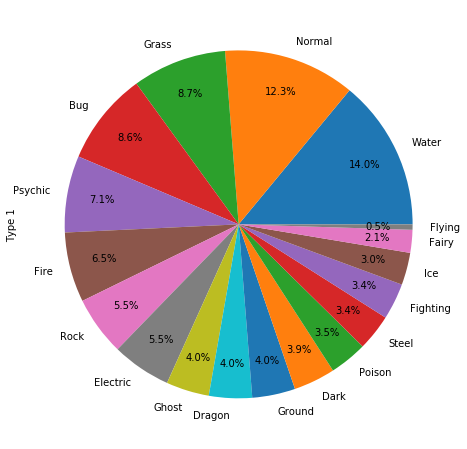

In [63]:
plt.figure(figsize=(8,8))

data2['Type 1'].value_counts().plot.pie( autopct='%1.1f%%', pctdistance=0.8)
plt.show()
#Some kind of Pie Chart

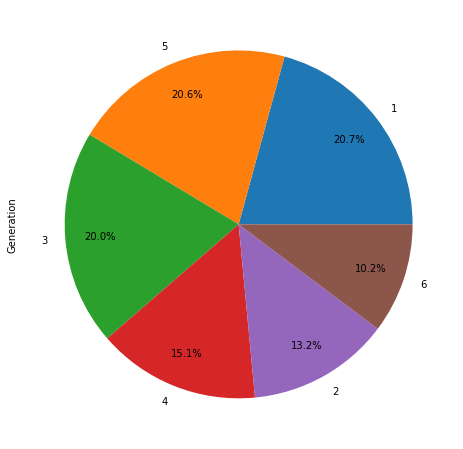

In [65]:
plt.figure(figsize=(8,8))

data2['Generation'].value_counts().plot.pie( autopct='%1.1f%%', pctdistance=0.8)
plt.show()

In [66]:
data2['Generation'].value_counts().sort_index()

1    166
2    106
3    160
4    121
5    165
6     82
Name: Generation, dtype: int64

In [67]:
strongest['Generation'].value_counts().sort_index()

1     6
2     2
3    13
4    10
5    11
6     2
Name: Generation, dtype: int64

In [68]:
perp = strongest['Generation'].value_counts().sort_index()/data2['Generation'].value_counts().sort_index()
perp

1    0.036145
2    0.018868
3    0.081250
4    0.082645
5    0.066667
6    0.024390
Name: Generation, dtype: float64

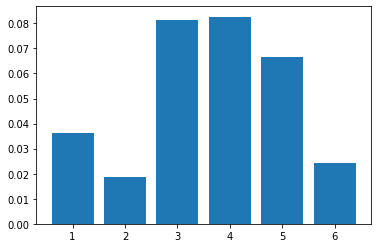

In [69]:
plt.bar(sorted(strongest['Generation'].unique()) ,perp )
plt.show()

Generation 3  4 and 5 have strongest pokemons compared to others

In [70]:
data2['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [71]:
strongest['Legendary'].value_counts().sort_index()

False    13
True     31
Name: Legendary, dtype: int64

In [73]:
contigency= pd.crosstab(data2['Legendary'], strongest['Legendary'])
contigency

Legendary,False,True
Legendary,,
False,13,0
True,0,31


In [ ]:
import scikit_l